# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DSBA/foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

**The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.**

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
print("Rows:", df.shape[0],
      "\nColumns:", df.shape[1])

Rows: 1898 
Columns: 9


#### Observations:

**By using an index value of 0 (rows) and 1 (columns), we're able to find out that there are 1898 Rows and 9 Columns**

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
**There is 1 column which is the float datatype: cost_of_the_order**

**There are 4 columns which are the int datatype: order_id, customer_id, food_preparation_time, delivery_time**

**There are 4 columns which are the object datatype: restaurant_name, cuisine_type, day_of_the_week, rating**


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
df['rating'].apply(type).value_counts()

<class 'str'>    1898
Name: rating, dtype: int64

In [ ]:
df['rating'] = df['rating'].replace(["Not given"], np.nan)
df['rating'] = df['rating'].astype(float)

df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
**There are 736 missing values from the 'ratings' column. I needed to replace the "Not given" values in the ratings column with NaN in order to determine that.**

**Additionally, we needed to correct the dataset by changing the datatype of the 'ratings' column from str to float.**


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
rating,1162.0,4.344234e+00,0.741478,3.00,4.00,5.00,5.000000e+00,5.00
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations:
**Statistics for the time it takes for food to be prepared are as follows:**

**Minimum:** 20

**Average:** 27.37

**Maximum:** 35

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
df['rating'].isnull().value_counts()

False    1162
True      736
Name: rating, dtype: int64

#### Observations:

**We can see from the output that there are 736 orders which are missing a rating.**



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [ ]:
df['order_id'].info()

print("\nThere are", df['order_id'].nunique(), "orders")

<class 'pandas.core.series.Series'>
RangeIndex: 1898 entries, 0 to 1897
Series name: order_id
Non-Null Count  Dtype
--------------  -----
1898 non-null   int64
dtypes: int64(1)
memory usage: 15.0 KB

There are 1898 orders


In [ ]:
df['customer_id'].value_counts()

52832     13
47440     10
83287      9
250494     8
259341     7
          ..
385426     1
254913     1
289597     1
74412      1
397537     1
Name: customer_id, Length: 1200, dtype: int64

In [ ]:
print("Among these 1898 orders, there are", df['customer_id'].nunique(), "unique customer IDs")

Among these 1898 orders, there are 1200 unique customer IDs


In [ ]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Sushi Choshi                   1
Dos Caminos Soho               1
La Follia                      1
Philippe Chow                  1
'wichcraft                     1
Name: restaurant_name, Length: 178, dtype: int64

In [ ]:
print("There are", df['restaurant_name'].nunique(), "different restaurants placing these orders.")

There are 178 different restaurants placing these orders.


In [ ]:
df['cuisine_type'].unique()

array(['Korean', 'Japanese', 'Mexican', 'American', 'Indian', 'Italian',
       'Mediterranean', 'Chinese', 'Middle Eastern', 'Thai', 'Southern',
       'French', 'Spanish', 'Vietnamese'], dtype=object)

In [ ]:
print("There are", df['cuisine_type'].nunique(), "cuisines included within these orders")

There are 14 cuisines included within these orders


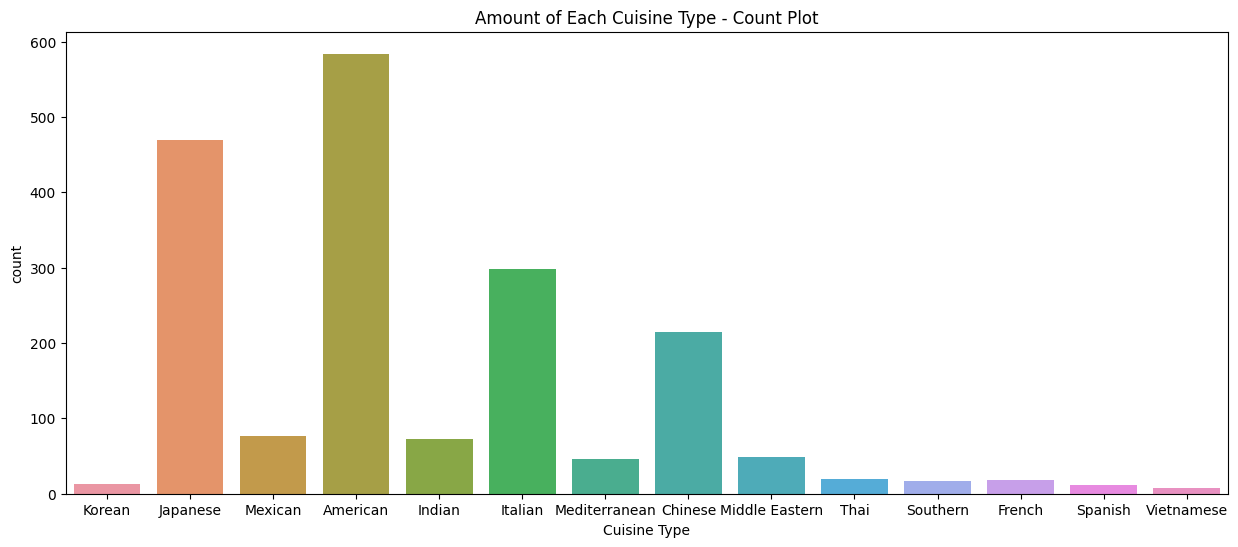

This Count plot shows how many orders were placed of each cuisine


In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(x='cuisine_type', data=df)
plt.title('Amount of Each Cuisine Type - Count Plot')
plt.xlabel('Cuisine Type')
plt.show()

print("This Count plot shows how many orders were placed of each cuisine")

In [ ]:
df['cuisine_type'].value_counts()

American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Southern           17
Korean             13
Spanish            12
Vietnamese          7
Name: cuisine_type, dtype: int64

In [ ]:
df['cost_of_the_order'].value_counts()

12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
         ..
5.48      1
17.07     1
6.26      1
9.61      1
29.59     1
Name: cost_of_the_order, Length: 312, dtype: int64

In [ ]:
print("There are", df['cost_of_the_order'].nunique(), "different prices at which these orders were placed")

There are 312 different prices at which these orders were placed


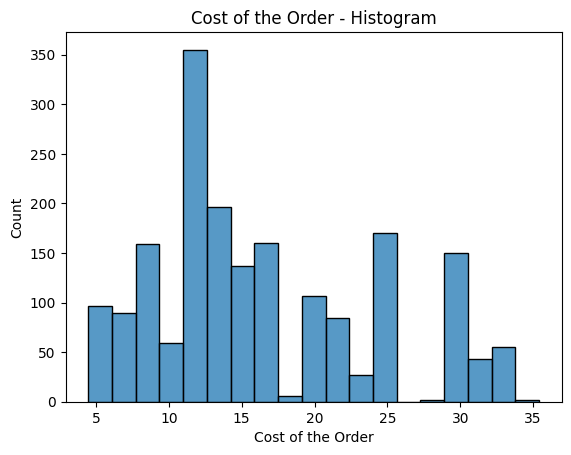

This histogram shows what the cost of each order was and how many orders were placed at each price point


In [ ]:
sns.histplot(x='cost_of_the_order', data=df)
plt.title('Cost of the Order - Histogram')
plt.xlabel('Cost of the Order')
plt.show()

print("This histogram shows what the cost of each order was and how many orders were placed at each price point")

In [ ]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

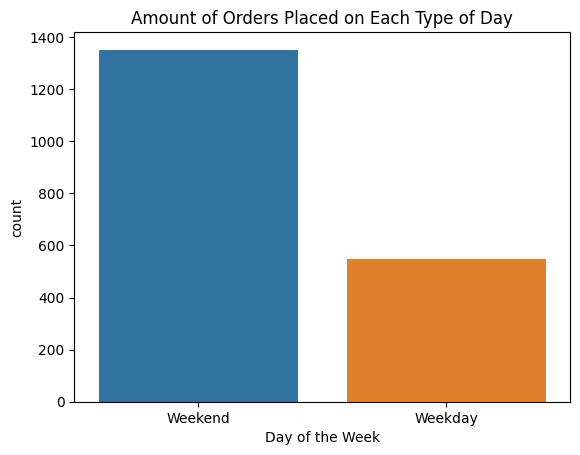

In [ ]:
sns.countplot(x='day_of_the_week', data=df)
plt.title('Amount of Orders Placed on Each Type of Day')
plt.xlabel('Day of the Week')
plt.show()

In [ ]:
print("There were", df['day_of_the_week'].value_counts()['Weekend'], "orders placed on a Weekend and",
      df['day_of_the_week'].value_counts()['Weekday'], "placed on a Weekday")

There were 1351 orders placed on a Weekend and 547 placed on a Weekday


In [ ]:
df['rating'].value_counts()

5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64

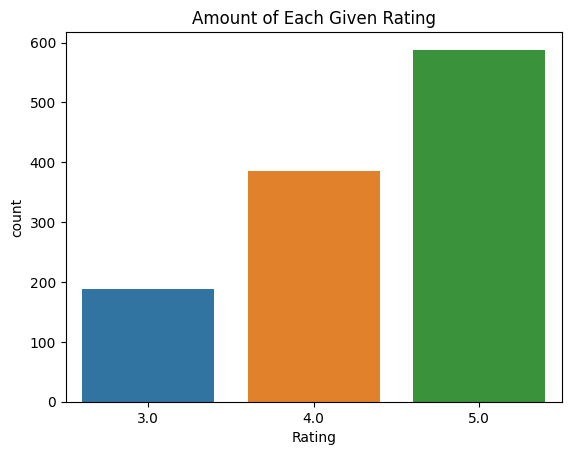

In [ ]:
sns.countplot(x='rating', data=df)
plt.title('Amount of Each Given Rating')
plt.xlabel('Rating')
plt.show()

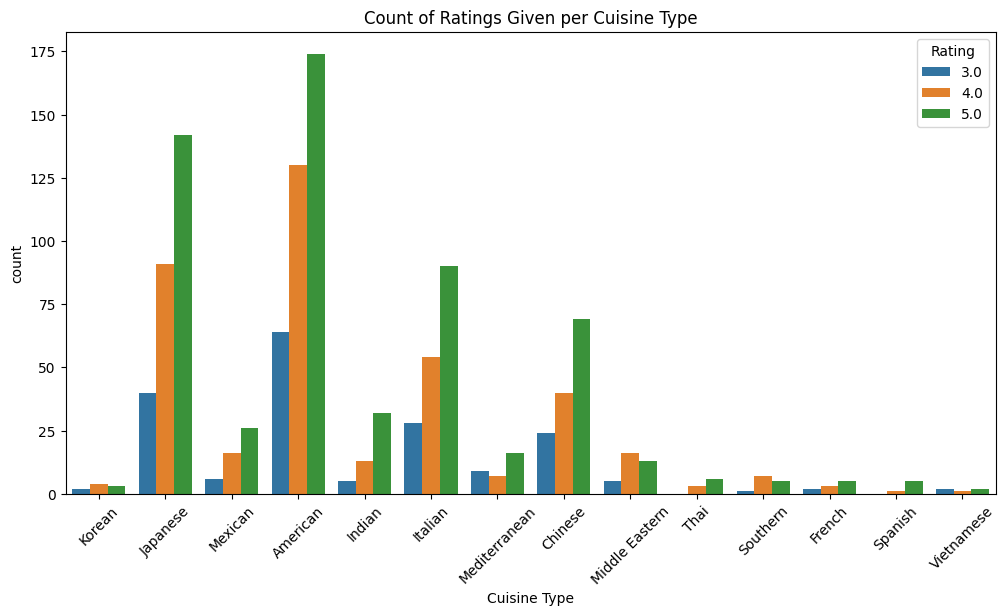

The count plot above shows how many of each rating were given to the various cuisine types


In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(hue='rating', x='cuisine_type', data=df)
plt.title('Count of Ratings Given per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.show()

print("The count plot above shows how many of each rating were given to the various cuisine types")

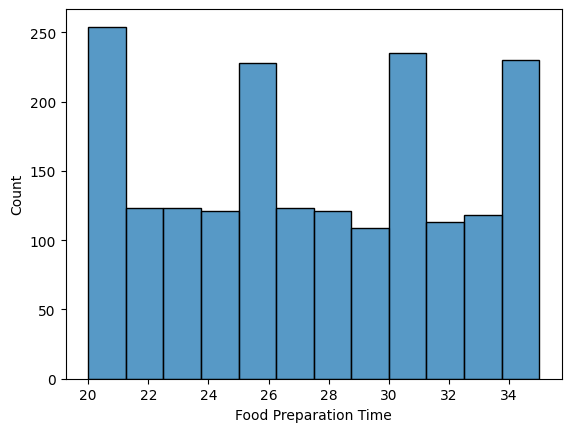

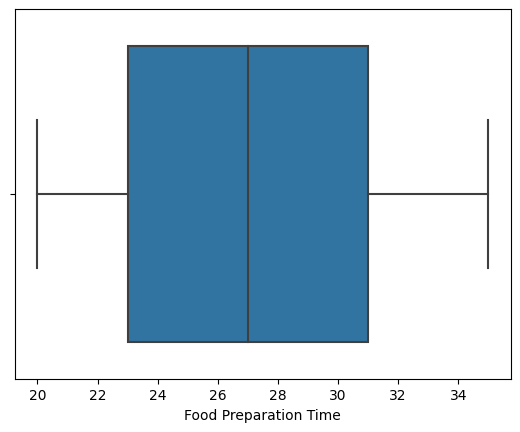

These figures above give us a visualization as to how long before each order was ready and how many orders took that long.
The box plot shows us how evenly spread out the data is for food preparation time.


In [ ]:
sns.histplot(x='food_preparation_time', data=df)
plt.xlabel('Food Preparation Time')
plt.show()

sns.boxplot(x='food_preparation_time', data=df)
plt.xlabel('Food Preparation Time')
plt.show()

print("These figures above give us a visualization as to how long before each order was ready and how many orders took that long.")
print("The box plot shows us how evenly spread out the data is for food preparation time.")

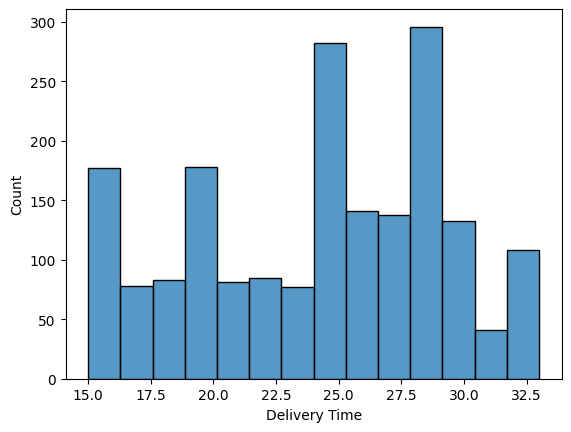

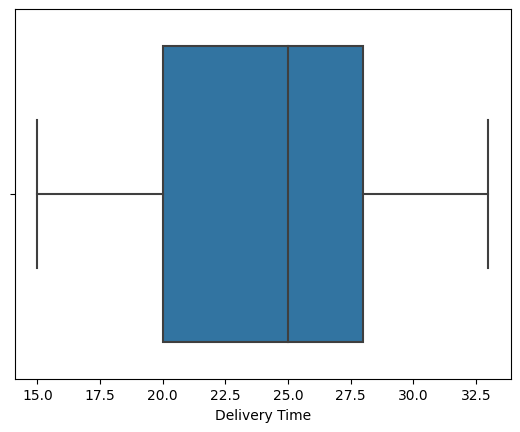

These figures show us how long each order had taken to be delivered.
They also show us how many orders had taken that amount of time.
The box plot also shows us how evenly spread out the data is for delivery times.


In [ ]:
sns.histplot(x='delivery_time', data=df)
plt.xlabel('Delivery Time')
plt.show()

sns.boxplot(x='delivery_time', data=df)
plt.xlabel('Delivery Time')
plt.show()


print("These figures show us how long each order had taken to be delivered.")
print("They also show us how many orders had taken that amount of time.")
print("The box plot also shows us how evenly spread out the data is for delivery times.")

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
rest_orders = df['restaurant_name'].value_counts()
rest_orders.head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

In [ ]:
rest_orders.tail(10)

Rohm Thai                  1
Dig Inn Seasonal Market    1
Socarrat Paella Bar        1
Alidoro                    1
Cipriani Le Specialita     1
Sushi Choshi               1
Dos Caminos Soho           1
La Follia                  1
Philippe Chow              1
'wichcraft                 1
Name: restaurant_name, dtype: int64

#### Observations:
**The top 5 restaurants in terms of the number of orders are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm, respectively.**



*Note: Since we are asking for top 5, I did not need to specify a number, as the command '.head()' already outputs the first 5. If we wanted to know Top 8 for example, I would input '.head(8)'*

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
wknd_total = df[df['day_of_the_week']=='Weekend']
wknd_total['cuisine_type'].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

In [ ]:
wkdy_total = df[df['day_of_the_week']=='Weekday']
wkdy_total['cuisine_type'].value_counts()

American          169
Japanese          135
Italian            91
Chinese            52
Mexican            24
Indian             24
Middle Eastern     17
Mediterranean      14
Southern            6
French              5
Thai                4
Vietnamese          3
Korean              2
Spanish             1
Name: cuisine_type, dtype: int64

#### Observations:
**The most popular cuisine on weekends is American cuisine, which actually also happens to be the most popular on weekdays as well.**

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
over_20 = df['cost_of_the_order']>20
over_20.value_counts()

False    1343
True      555
Name: cost_of_the_order, dtype: int64

In [ ]:
over_20.mean()*100

29.24130663856691

#### Observations:
**29.24% of the orders cost more than 20 dollars**

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
avg_delivery = df['delivery_time'].mean()
avg_delivery

24.161749209694417

#### Observations:
**The mean order delivery time is 24.16 minutes**

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
df['customer_id'].value_counts().head(3)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
**The company would be giving the 20% discount vouchers to the customer ID numbers** 52832, 47440, **and** 83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


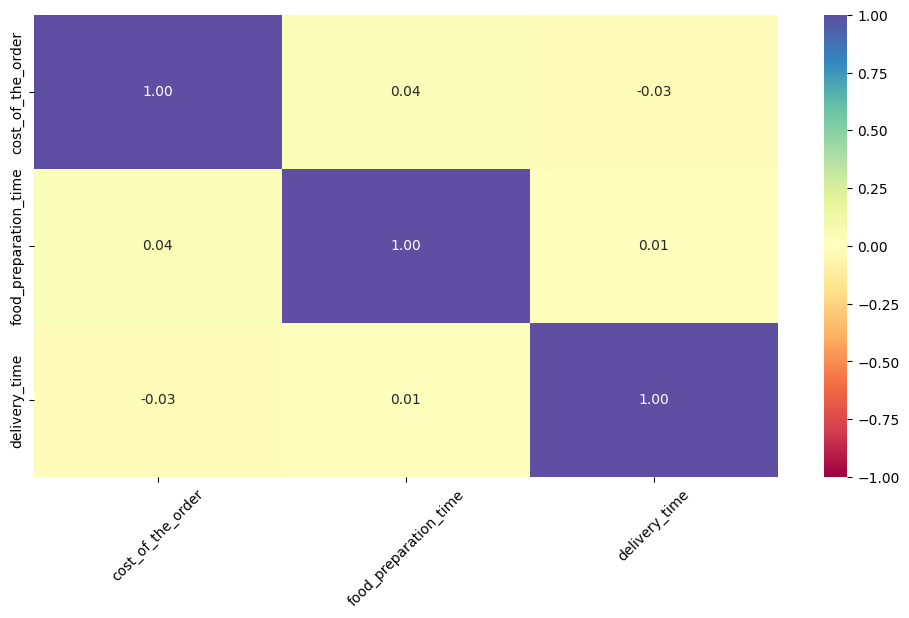

In [ ]:
hm_columns = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

plt.figure(figsize=(12,6))
sns.heatmap(df[hm_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.xticks(rotation=45)
plt.show()

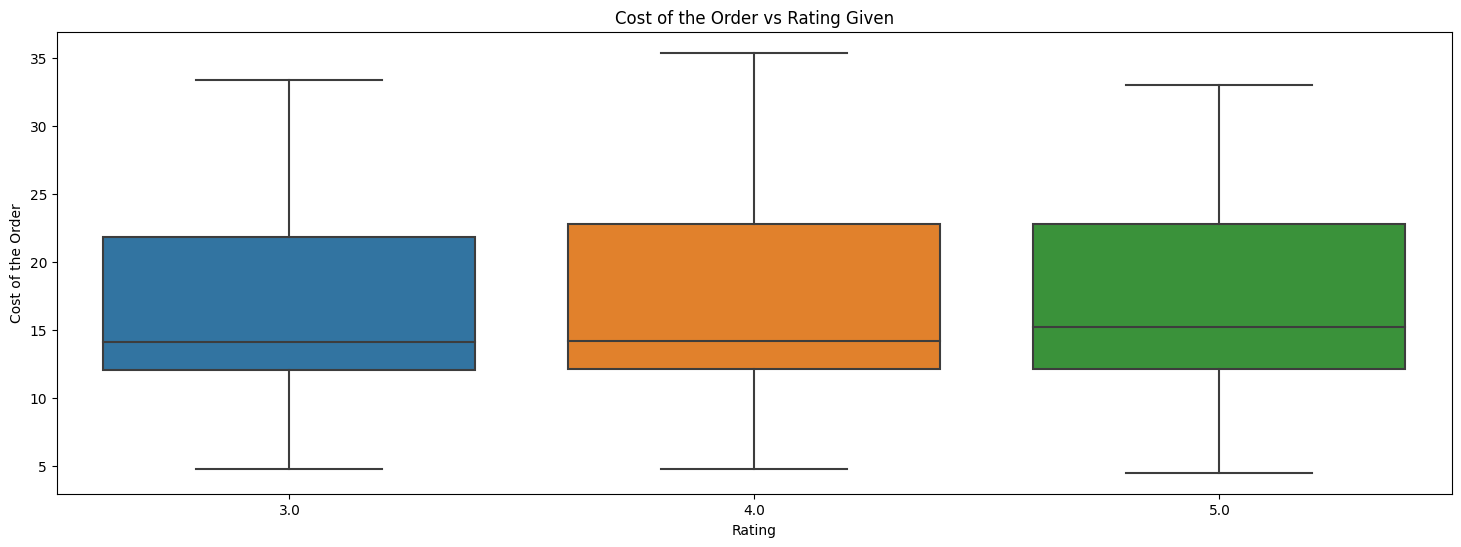

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(x='rating', y='cost_of_the_order', data=df)
plt.title('Cost of the Order vs Rating Given')
plt.xlabel('Rating')
plt.ylabel('Cost of the Order')
plt.show()

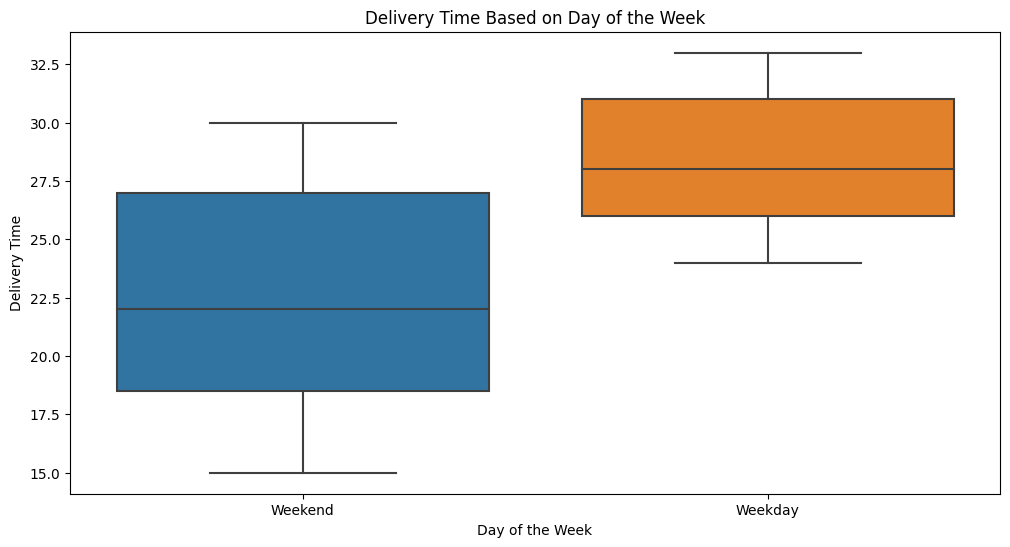

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time Based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()

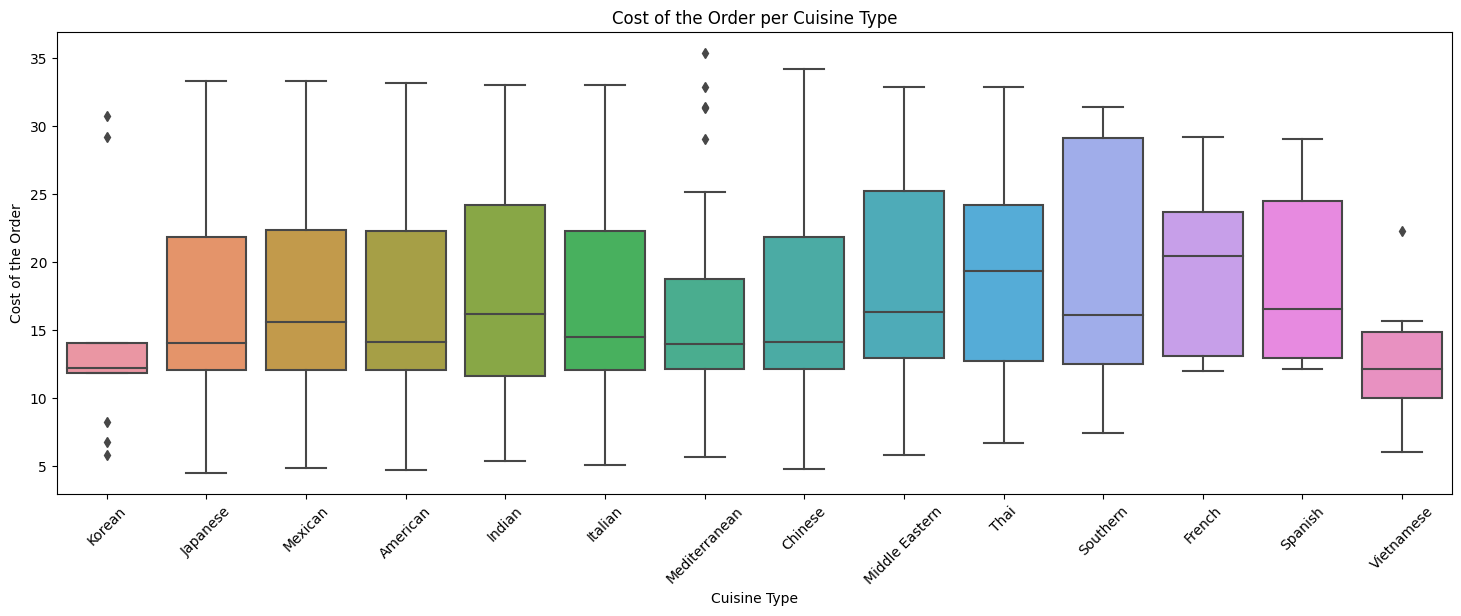

In [ ]:
plt.figure(figsize=(18,6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.title('Cost of the Order per Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=45)
plt.show()

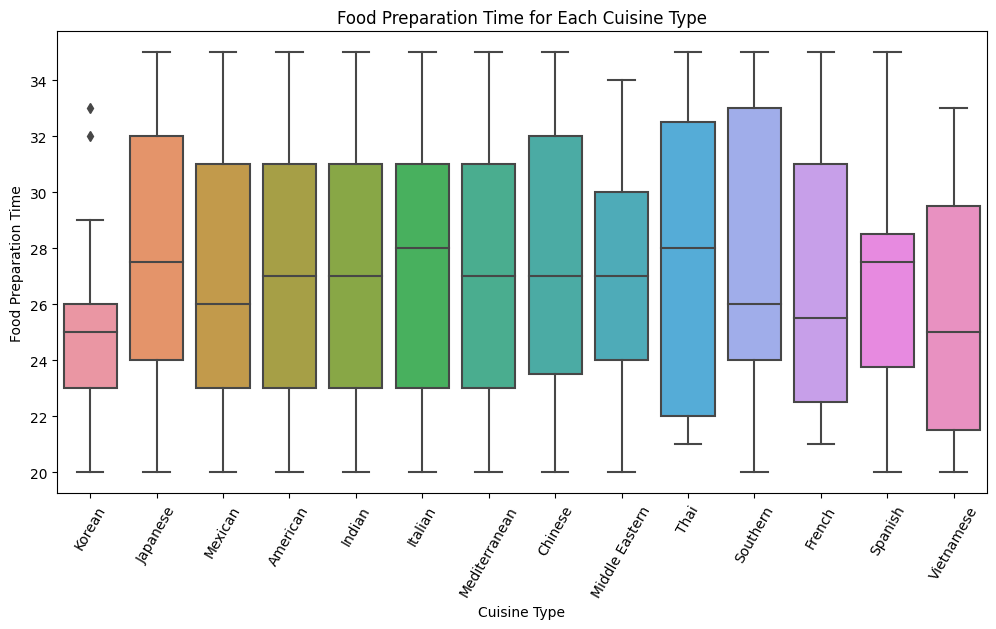

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)
plt.title('Food Preparation Time for Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Food Preparation Time')
plt.xticks(rotation=60)
plt.show()

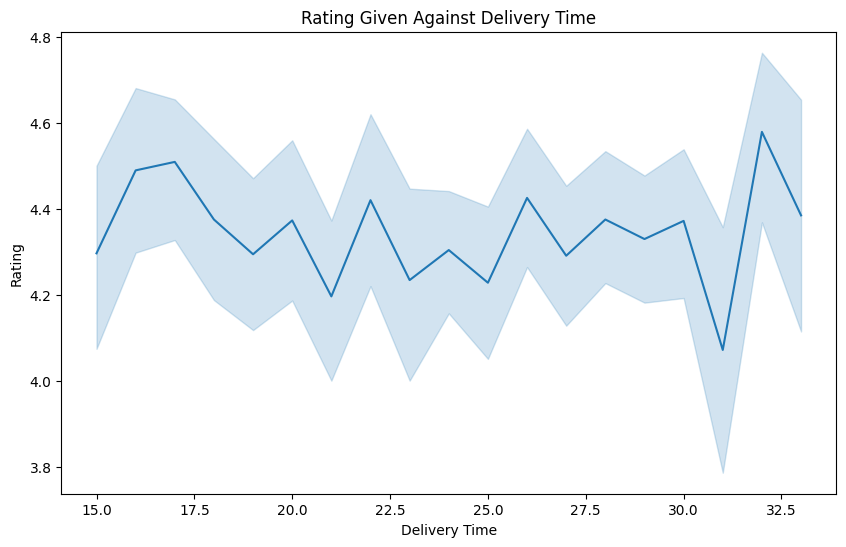

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='delivery_time', y='rating', data=df)
plt.title('Rating Given Against Delivery Time')
plt.xlabel('Delivery Time')
plt.ylabel('Rating')
plt.show()

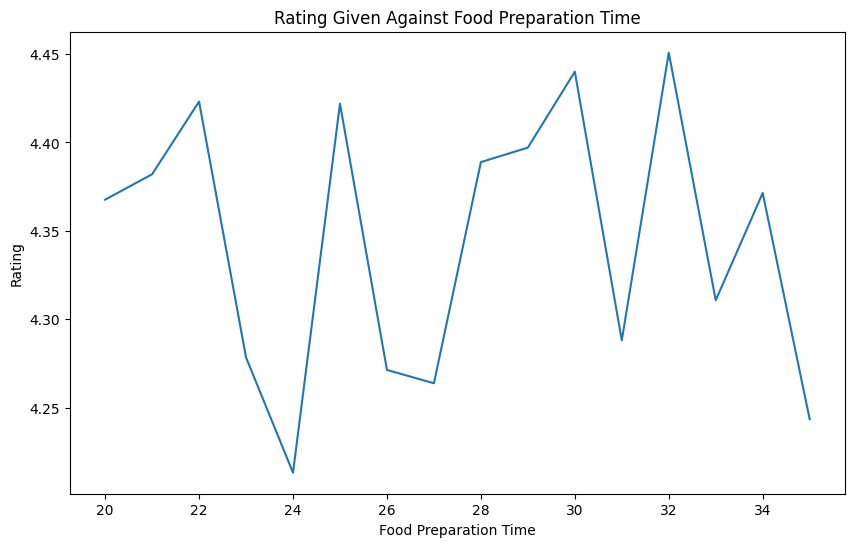

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x='food_preparation_time', y='rating', data=df, errorbar=None)
plt.title('Rating Given Against Food Preparation Time')
plt.xlabel('Food Preparation Time')
plt.ylabel('Rating')
plt.show()

In [ ]:
print("Average Rating per Cuisine Type\n")

avg_cuis_rat = df.groupby('cuisine_type')['rating'].mean().reset_index()
sorted_avg = avg_cuis_rat.sort_values(by='rating', ascending=False)
sorted_avg

Average Rating per Cuisine Type



,cuisine_type,rating
11,Spanish,4.833333
12,Thai,4.666667
3,Indian,4.540000
8,Mexican,4.416667
5,Japanese,4.373626
4,Italian,4.360465
1,Chinese,4.338346
10,Southern,4.307692
2,French,4.300000
0,American,4.298913


In [ ]:
print("I've calculated the average rating given to each cuisine type and have represented them in this dataframe in order of highest to lowest average rating")

I've calculated the average rating given to each cuisine type and have represented them in this dataframe in order of highest to lowest average rating


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
avg_ratings_r = df.groupby('restaurant_name')['rating'].agg(['mean','count']).reset_index()
avg_ratings_r = avg_ratings_r.dropna(subset=['mean'])

offer = avg_ratings_r[(avg_ratings_r['count']>50) & (avg_ratings_r['mean']>4)]
offer

,restaurant_name,mean,count
20,Blue Ribbon Fried Chicken,4.328125,64
21,Blue Ribbon Sushi,4.219178,73
136,Shake Shack,4.278195,133
153,The Meatball Shop,4.511905,84


#### Observations:
**The restaurants that should receive the promotional offer are Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop, as these 4 restaurants all maintained an average rating greater than 4 with a total of more than 50 ratings.**

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
rev_func = lambda x: 0.25 * x if x > 20 else 0.15 * x if x > 5 else 0

df['revenue'] = df['cost_of_the_order'].apply(rev_func)

rev = df['revenue'].sum()
print(rev)

6166.303


#### Observations:
**Using the parameters mentioned, the company's net revenue across all orders comes out to $6,166.30**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['order_time'] = df['food_preparation_time'] + df['delivery_time']
long_orders = df[df['order_time']>60]

long_orders

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,revenue,order_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,NaN,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4.0,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,NaN,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3.0,35,29,5.6875,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4.0,35,26,2.9100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,NaN,35,28,5.5775,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,NaN,32,33,1.8345,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5.0,35,27,2.0955,62


In [ ]:
long_orders_perc = (long_orders['order_time'].count())/(df['order_time'].count()) * 100
long_orders_perc

10.537407797681771

#### Observations:
**From the data provided, I calculated that about 10.54% of all orders take more than 60 minutes from the time the order is placed to the time the order is delivered.**

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
m_wkdy_del = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
m_wknd_del = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()

print("Mean Weekday Delivery Time:", m_wkdy_del, "\nvs. \nMean Weekend Delivery Time:", m_wknd_del)

Mean Weekday Delivery Time: 28.340036563071298 
vs. 
Mean Weekend Delivery Time: 22.4700222057735


#### Observations:
**We can see that the mean delivery time on weekdays is 28.34 minutes, which is higher than the mean delivery time on weekends at 22.47 minutes.**

**Though there are other factors which could lead to the fluctuations in delivery times, such as varied "busy" hours like the lunch rush, it's more likely that these variations have a more obvious reasoning.**

**We can fairly deduce that the delivery time on weekdays might be negatively affected by other traffic, which is common during work/school hours. This compared to the weekends, in which there is no work/school traffic, thus a higher likelihood of more open roads, providing the ability to make deliveries quicker than on weekdays.**

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
Based on the Exploratory Data Analysis performed, we can extract quite a few key insights about the data provided.
* Firstly, we can see that the most popular cuisine was American, receiving 584 of the total orders, followed closely by Japanese, receiving 470 of the orders.
* Shake Shack was by far the most popular restaurant, getting 219 orders.
* More orders were placed on weekends as opposed to weekdays.
* Pretty much all restaurant orders required between 20-35 minutes for food preparation, while most orders took ~24-28mins for delivery.
* An overwhelming majority of orders cost less than 20 dollars.
* There seemed to be almost no correlation between any of the numerical categories: Cost of the Order, Food Preparation Time, and Delivery Time.
* More than 50% of all orders that were given a 3.0 rating cost more than $15. This holds true for 4.0 and 5.0 ratings as well.
* All of the weekday orders took more than 23mins for delivery (averaging at 28.34mins), whereas a little more than 50% of weekend orders spent less than 23mins on delivery (averaging 22.47mins).
* The ratings given were seemingly unaffected by the food preparation time or delivery time, as there are large amounts of variation amongst both.
* Every cuisine had an average rating of 4.0 and above.

### Recommendations:

*  We can see that since American restaurants seem to be the most popular, it might be worth spending more of the marketing budget on those restaurants.
* Southern cuisine generally had a high cost of the order, but only received 17 orders, so we might want to promote Southern restaurants a bit more to increase revenue.
* Since the delivery time on weekdays is significantly higher, this takes time away from other deliveries that could be made during that time, so FoodHub should hire more delivery drivers for the weekdays to accommodate.
* Though only 188 of the 1162 ratings given were 3.0 (16% of the toal), FoodHub should look in these low ratings to determine why they were given and try to bring that amount down to below 10% if possible.

---

In [ ]:
%%shell
jupyter nbconvert --to html //content/FoodHub_Project_FullCode.ipynb

[NbConvertApp] Converting notebook //content/FoodHub_Project_FullCode.ipynb to html
[NbConvertApp] Writing 1361942 bytes to //content/FoodHub_Project_FullCode.html
